In [ ]:
# pip install seaborn
import seaborn as sns # 고급시각화를 위한 라이브러리
import matplotlib.pyplot as plt # 그래프 출력과 세부 설정을 위해 함께 사용됨
import os
os.chdir(r'D:\새 폴더\Programing\Academy\Python\day0827')


In [2]:
sns.set_theme() #default_theme 적용

> 식당에서 지불한 총금액과 팁 정보
> - total_bill: 식당에서 받은 총 계산 금액
> - tip: 팁 금액
> - sex: 계산을 한 사람의 성별 ("Male", "Female")
> - smoker: 흡연 여부 (흡연자인지 아닌지)
> - day: 방문한 요일 (예: "Thur", "Fri", "Sat", "Sun")
> - time: 식사 시간 ("Lunch" 또는 "Dinner")
> - size: 방문한 인원 수 

In [18]:
tips=sns.load_dataset('tips')
tips.head()
# tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


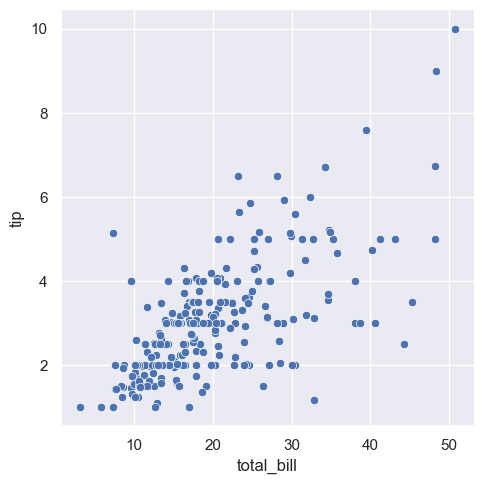

In [ ]:
g=sns.relplot(data=tips, x='total_bill',y='tip') # 관계형 그래프
# 산점도를 그려줌 -> 두 데이터 간의 관계를 점으로 표현

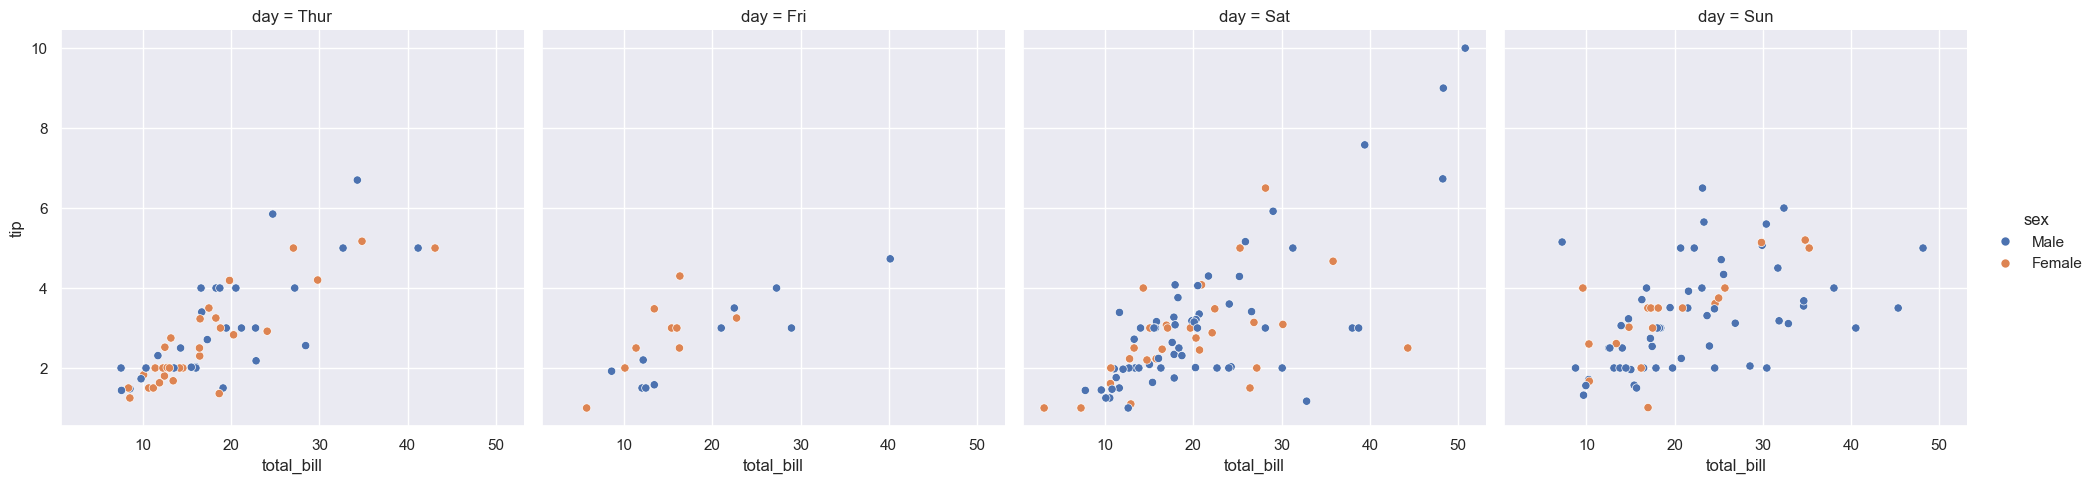

In [10]:
g=sns.relplot(data=tips, x='total_bill',y='tip',hue='sex',col='day')
# hue,col,row 옵션 : 그룹,조건별로 더 풍부한 그래프를 그릴수 있음.
# hue : 데이터의 값(범주)에 따라 점/선 색상을 다르게 표시
# col : 그래프를 열방향으로 분할
# row : 그래프를 행방향으로 분할

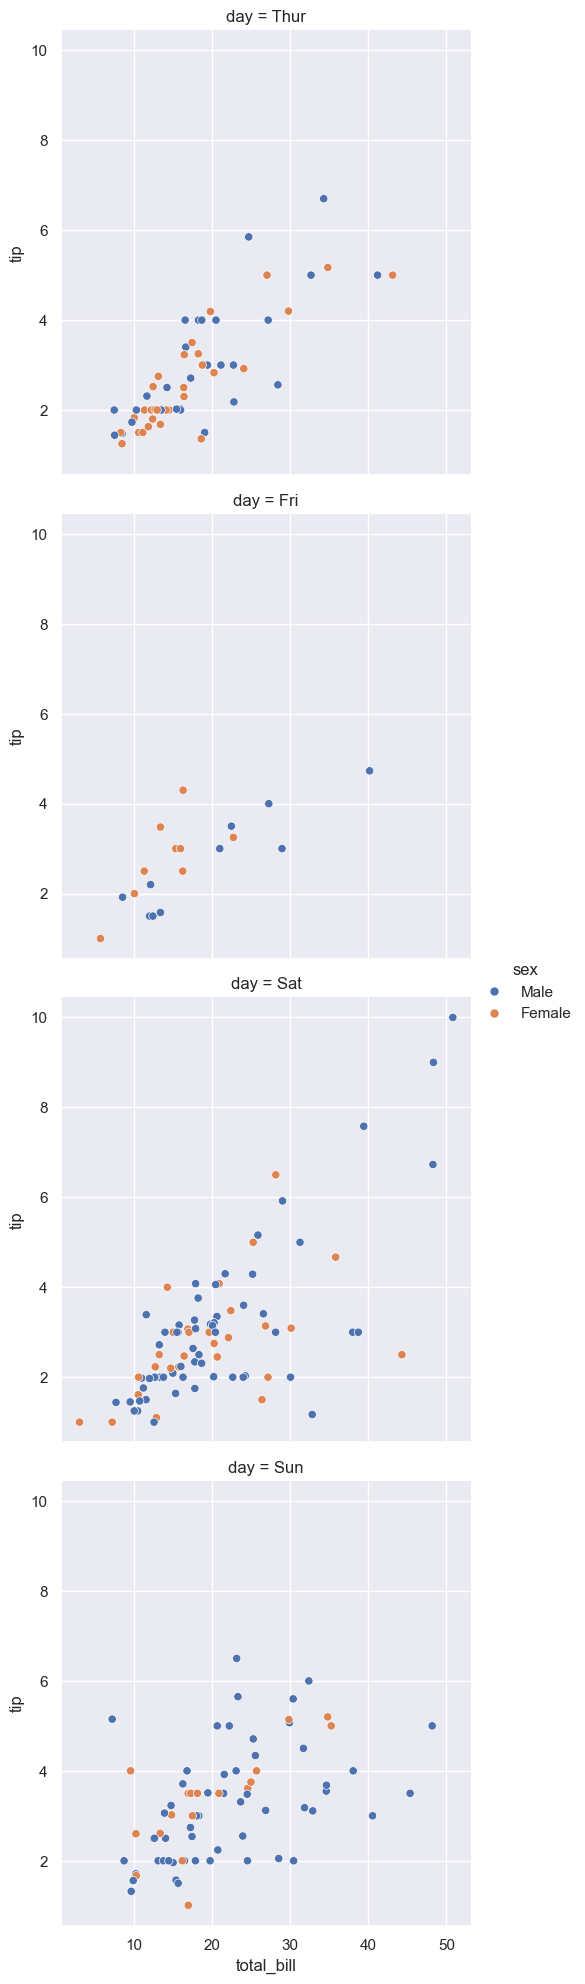

In [ ]:
g=sns.relplot(data=tips, x='total_bill',y='tip',hue='sex',row='day')

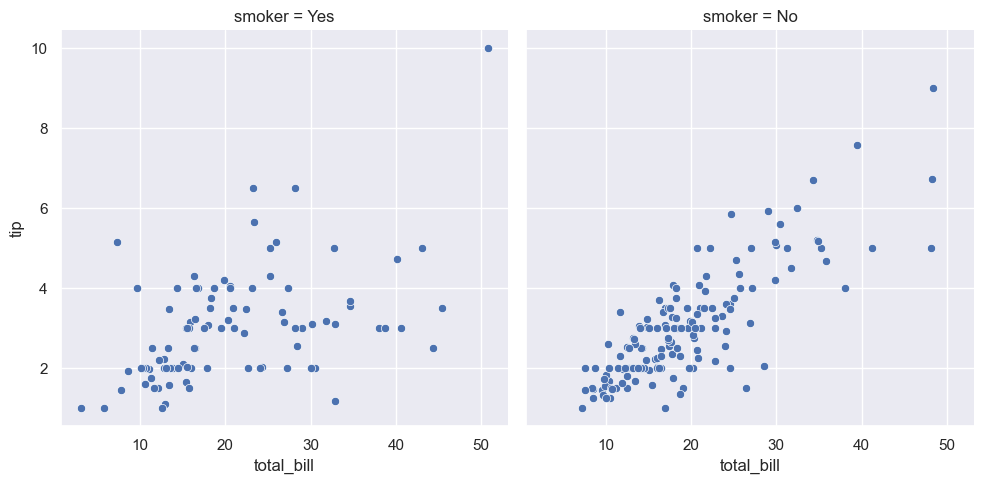

In [ ]:
# 흡연 여부와 tip과의 상관관계

g=sns.relplot(data=tips,x='total_bill',y='tip',col='smoker')
# -> 흡연여부와 tip 과의 관계는 없지만, 비흡연자의 경우 흡연자보다 total,과 tip의 상관관계가 더 크게 나타남.


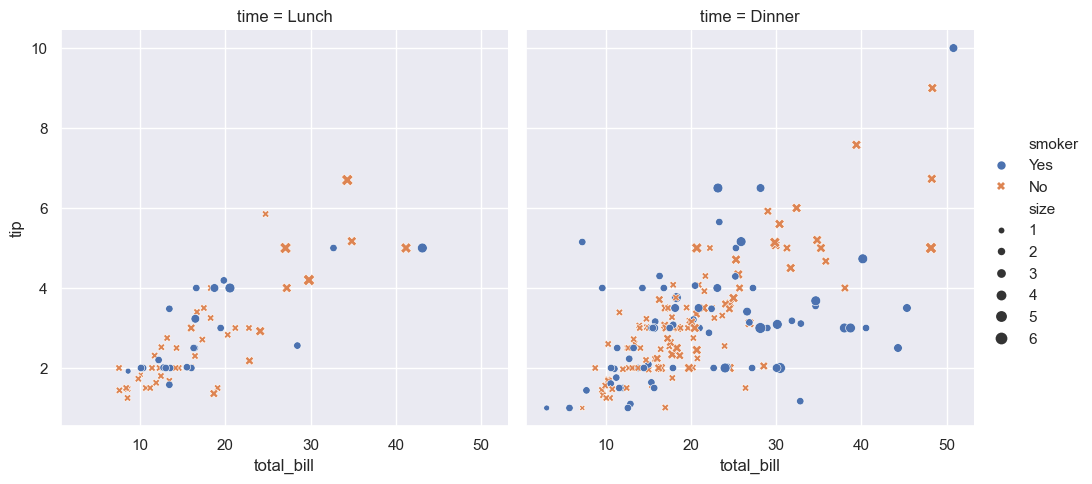

In [ ]:
g=sns.relplot(data=tips, x='total_bill',y='tip',col='time',hue='smoker',style='smoker',size='size')
# style : 값에 따라 점의 모양을 달리함
# size : 값에 따라 점의 크기가 달라짐

In [37]:
# 선차트
fmri=sns.load_dataset('fmri')
fmri.head()
# fmri.info()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


- subject : 피실험자 ID
- timepoint : 측정시간
- event : 실험자극 종류(stim,cue)
- region : 뇌영역(parietal, frontal)
- signal : 해당 시점에 측정된 fMRI 값

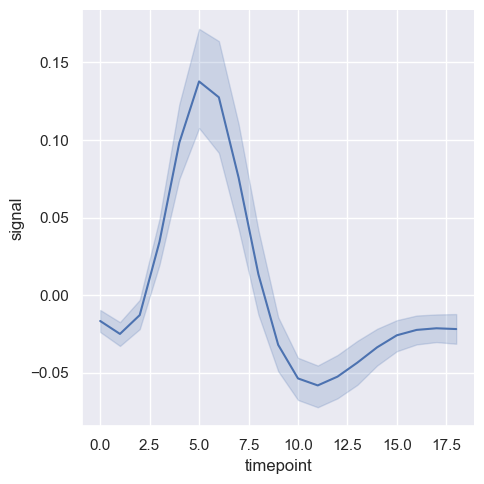

In [ ]:
# 시간의 경과에 따른 fmri 신호의 변화
# 같은 x에 대해 y값이 여러개 있다면 평균을 내고 신뢰구간을 음영으로 표시
g= sns.relplot(kind='line',data=fmri,x='timepoint',y='signal')


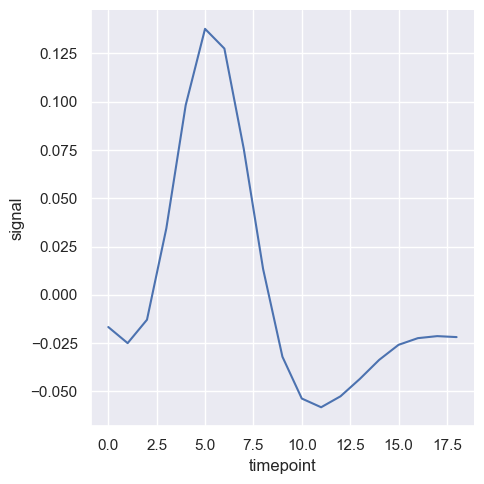

In [ ]:
# 신뢰 구간과 오차범위 제거
g= sns.relplot(kind='line',data=fmri,x='timepoint',y='signal',errorbar=None)


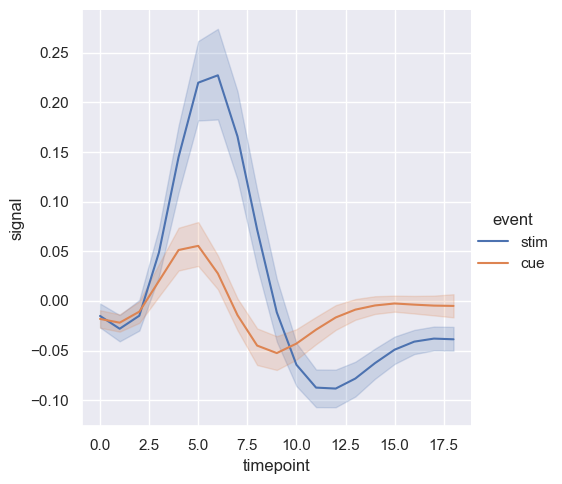

In [ ]:
# 자극에 따른 그래프
g=sns.relplot(kind='line',data=fmri,x='timepoint',y='signal',hue='event')

In [50]:
# 히스토그램
penguins=sns.load_dataset('penguins')
penguins.head()
penguins['species'].drop_duplicates()

0         Adelie
152    Chinstrap
220       Gentoo
Name: species, dtype: object

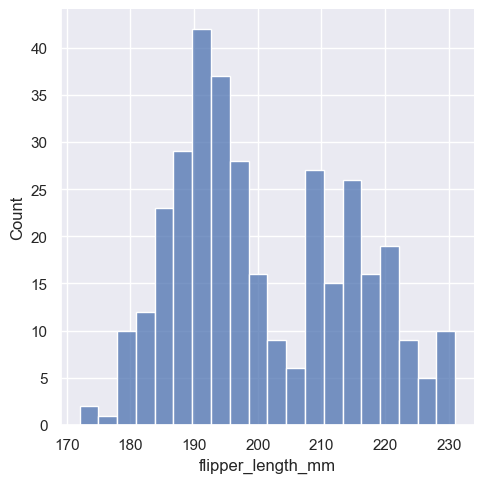

In [51]:
# 팽귄 날개 길이 분포
# 히스토그램(histogram) : 데이터가 어떻게 퍼져있는지 분포의 형태를 파악시 사용
g=sns.displot(data=penguins,x='flipper_length_mm',binwidth=3)

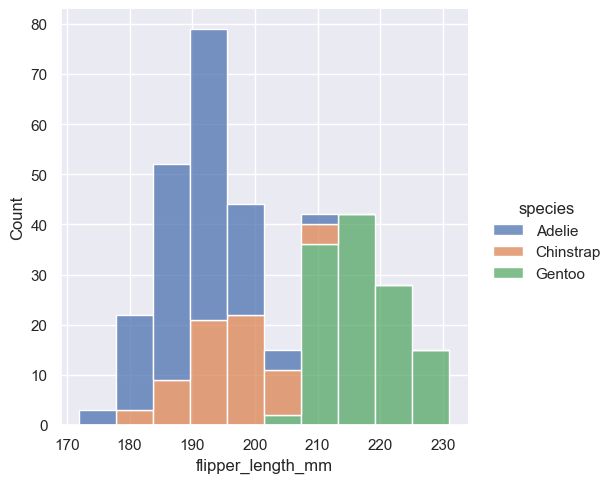

In [ ]:
# 스택으로 쌓아서 확인
# 종별 날개길이
g=sns.displot(data=penguins,x='flipper_length_mm',hue='species',multiple='stack')

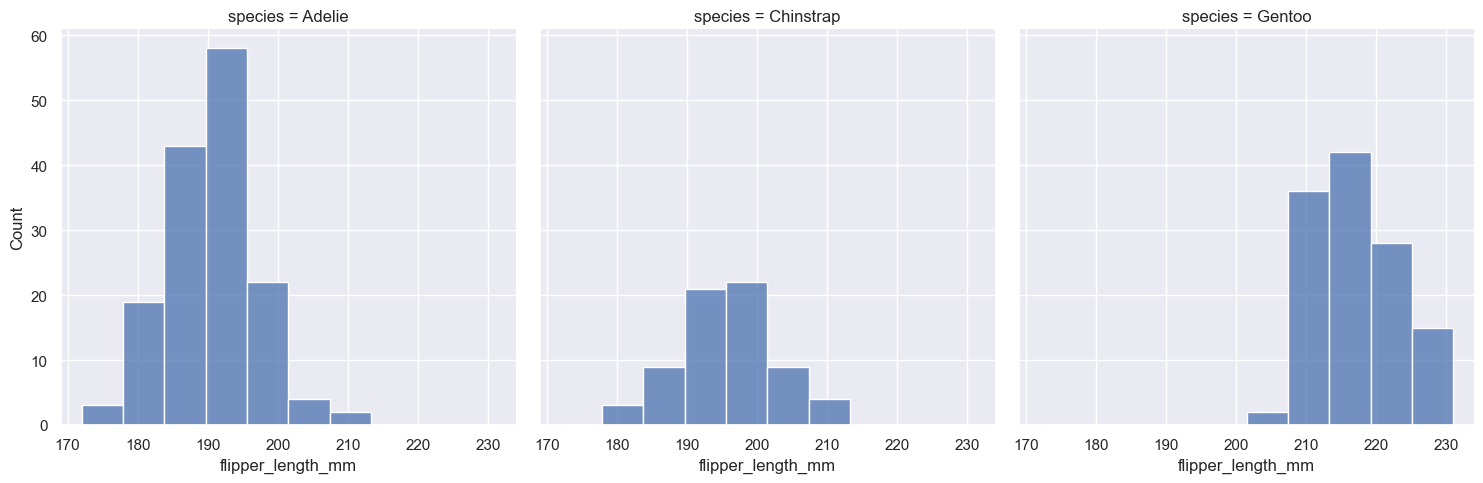

In [ ]:
# 차라리 col을쓰는게 종별 분포를 보긴 편할듯
g=sns.displot(data=penguins,x='flipper_length_mm',col='species')

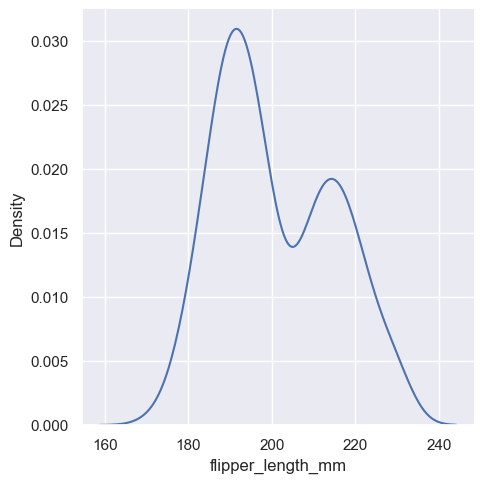

In [ ]:
#KDE : 커널 밀도 추정, 데이터의 분포를 곡선으로 부드럽게 보여줌
g=sns.displot(data=penguins,x='flipper_length_mm',kind='kde')

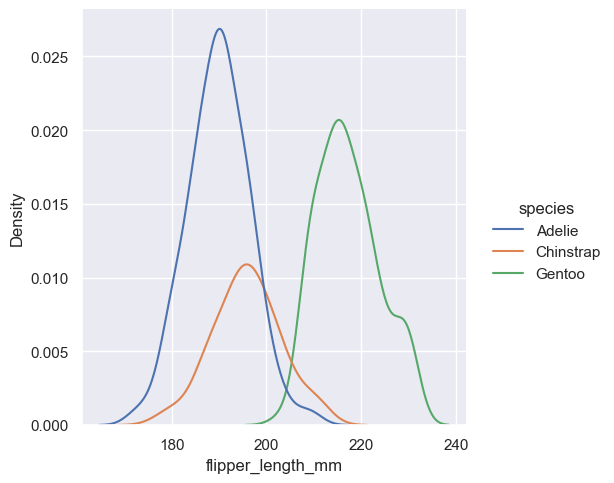

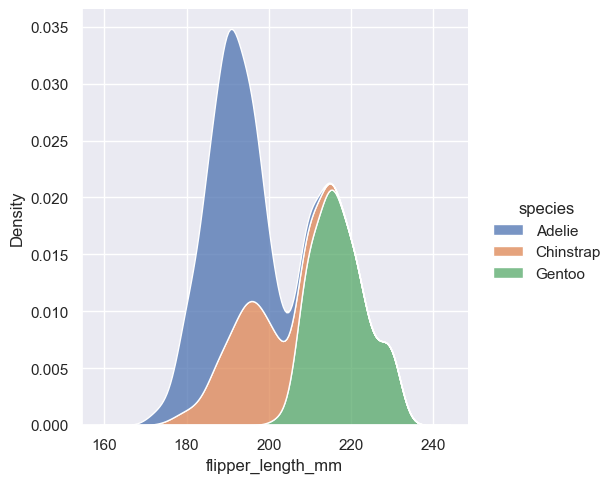

In [66]:
# 곡선 내부를 채우기
g=sns.displot(data=penguins,x='flipper_length_mm',hue="species",kind='kde')
display(g)
g=sns.displot(data=penguins,x='flipper_length_mm',hue="species",kind='kde',multiple='stack')

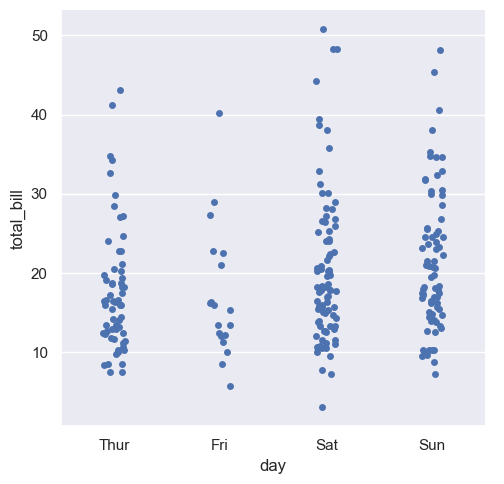

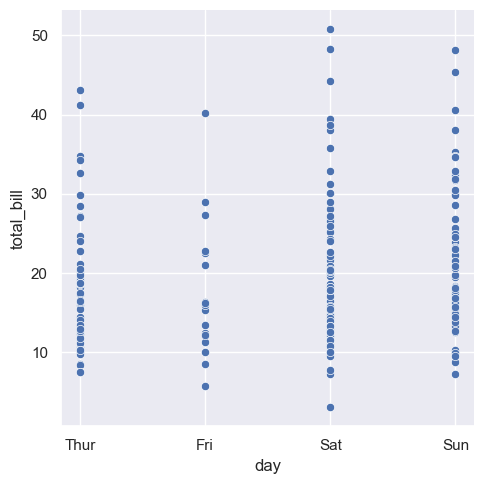

In [ ]:
# 범주형 그래프
# catplot : 기본형 kind='strip' (스트립 플롯, 데이터 점을 흩뿌리는 형태)
tips=sns.load_dataset('tips')
g=sns.catplot(data=tips,x='day',y='total_bill')
g=sns.relplot(data=tips,x='day',y='total_bill')

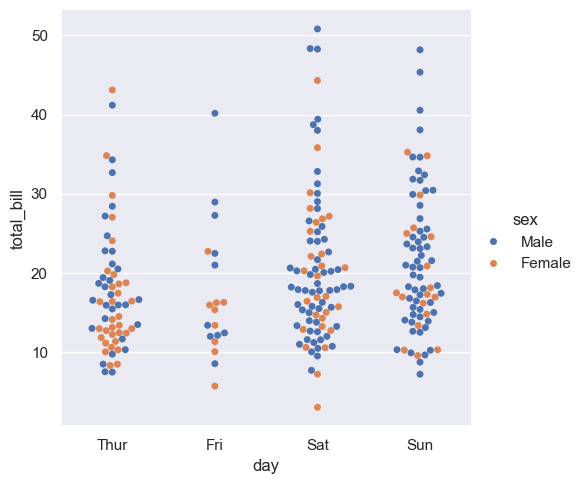

In [69]:
g=sns.catplot(data=tips,x='day',y='total_bill',hue='sex',kind='swarm')
# kind='swarm' : 점이 겹치지 않게 뿌림

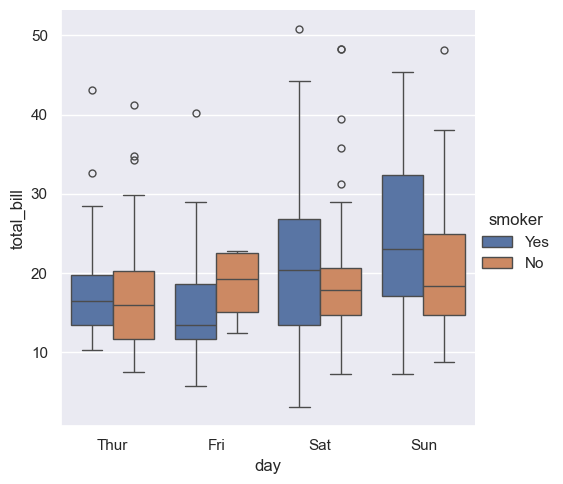

In [81]:
# kind를 box로
g=sns.catplot(data=tips,x='day',y='total_bill',hue='smoker',kind='box')

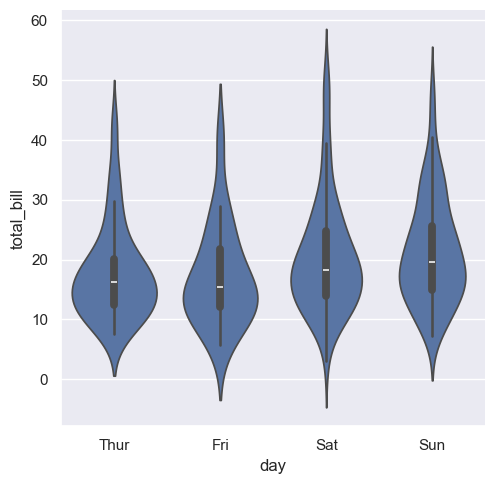

In [82]:
# violin 모양
g=sns.catplot(data=tips,x='day',y='total_bill',kind='violin')
